<a href="https://colab.research.google.com/github/kumarchandan/100-days-of-deep-learning/blob/master/day-7/Day_7_Building_Complex_Models_Using_the_Functional_API_Part_2_(Multiple_Outputs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Complex Models Using the Functional API

## California Housing Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()


In [ ]:
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [ ]:
print(housing.feature_names)
# features: 8
print(housing.data.shape)
# target
print(housing.target.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
(20640,)


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # default 25% split

In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(15480, 8)
(15480,)
(5160, 8)
(5160,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)


In [ ]:
# Values before transformation
X_train[0]

array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
        1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c21fabe0>,
      dtype=object)

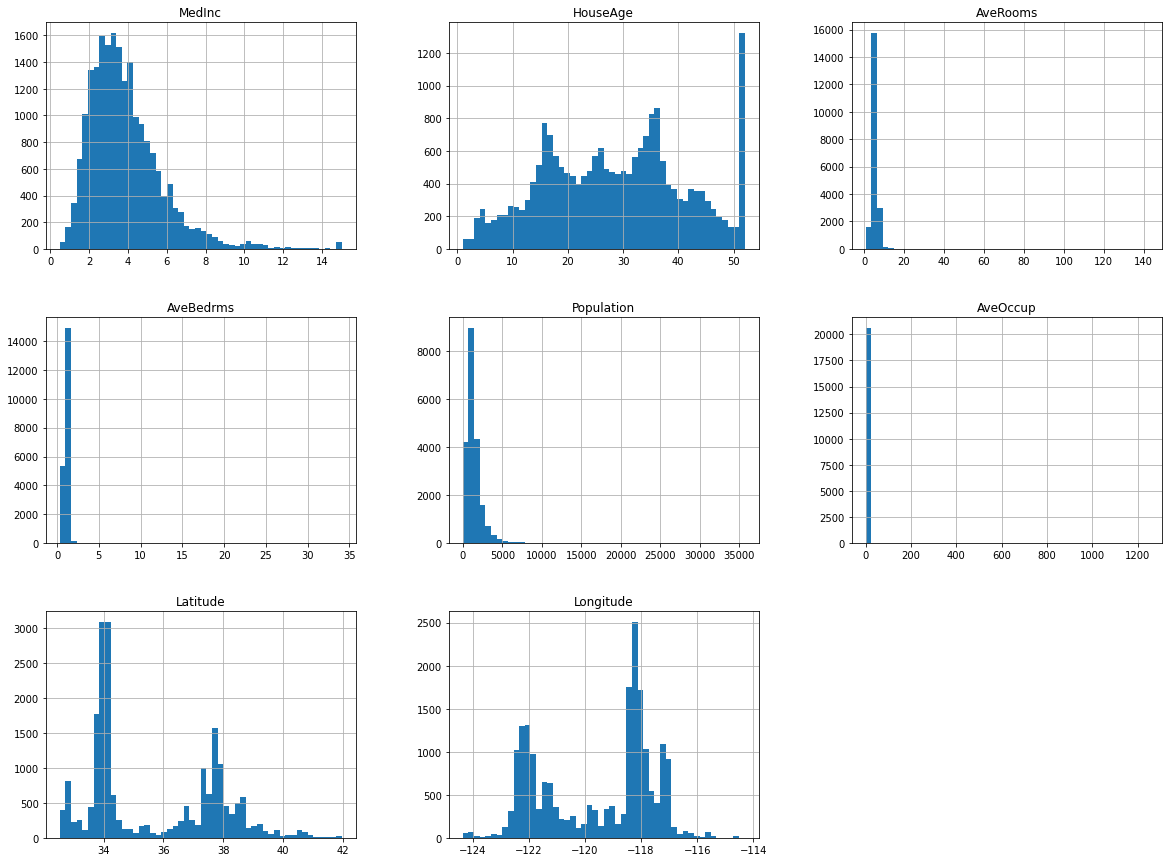

In [ ]:
housing_df.hist(bins=50, figsize=(20, 15))

In [ ]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train) # fit().transform() - fit() calculates params required for z

X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)


In [ ]:
# transformed values
X_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train.shape[1:]

(8,)

# Multiple Outputs

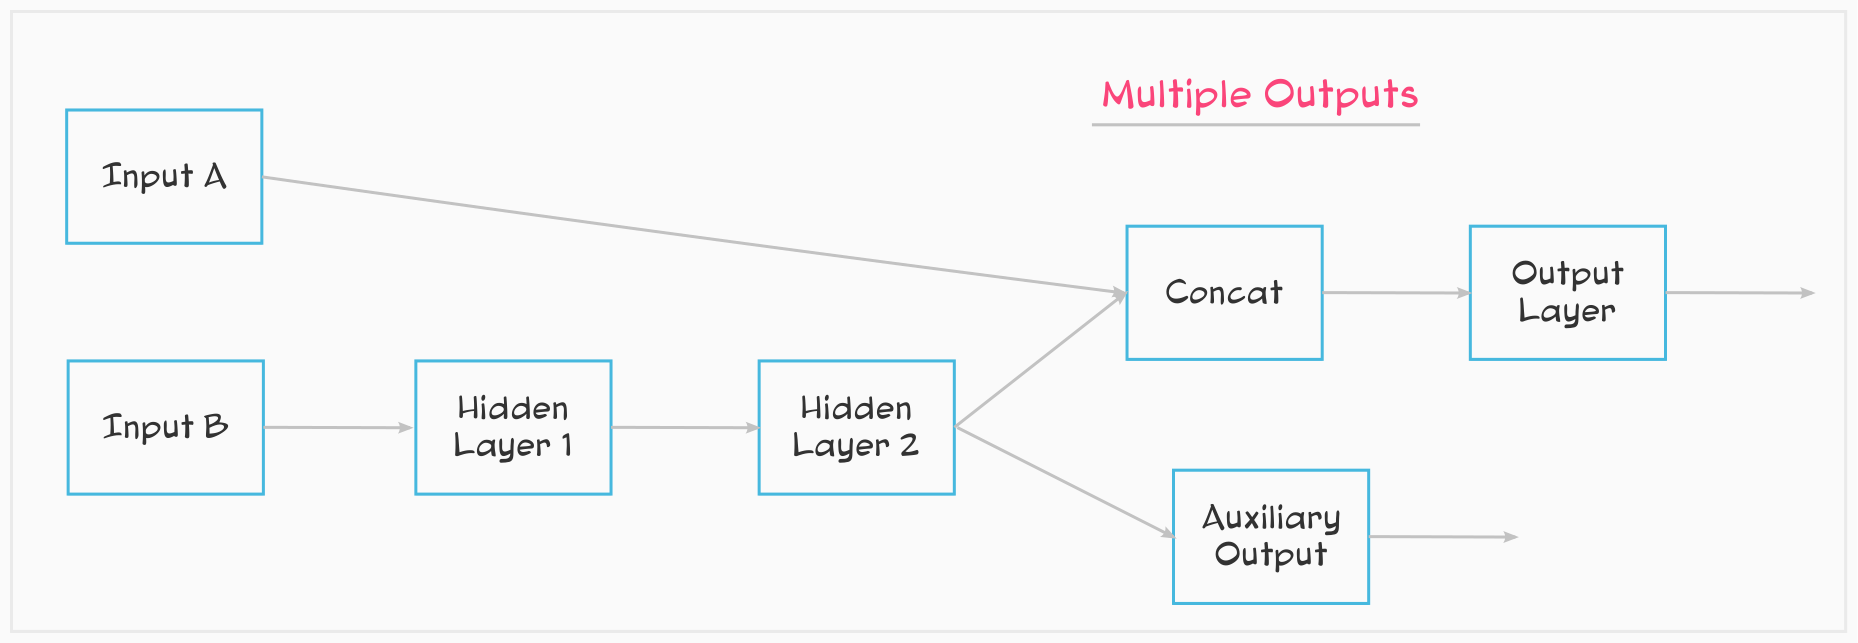

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu', name='hidden_1')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name='hidden_2')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_2 (Dense)                (None, 30)           930         hidden_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]


In [ ]:
model.compile(optimizer='adam', loss=['huber_loss', 'mse'], loss_weights=[0.9, 0.1])

history = model.fit(x=[X_train_A, X_train_B], y=[y_train, y_train], epochs=30, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1574 - output_loss: 0.1356 - aux_output_loss: 0.3532 - val_loss: 0.1533 - val_output_loss: 0.1298 - val_aux_output_loss: 0.3646
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1562 - output_loss: 0.1345 - aux_output_loss: 0.3508 - val_loss: 0.1854 - val_output_loss: 0.1434 - val_aux_output_loss: 0.5633
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1565 - output_loss: 0.1348 - aux_output_loss: 0.3519 - val_loss: 0.1549 - val_output_loss: 0.1322 - val_aux_output_loss: 0.3597
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1557 - output_loss: 0.1341 - aux_output_loss: 0.3498 - val_loss: 0.1579 - val_output_loss: 0.1351 - val_aux_output_loss: 0.3634
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1555 - output_loss: 0.1341 - aux_output_loss: 0.3489 - val_loss: 0.1875 - val_output_loss: 0.1493 - val_aux_

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(total_loss)
print(main_loss)
print(aux_loss)

162/162 [==============================] - 0s 997us/step - loss: 0.1514 - output_loss: 0.1305 - aux_output_loss: 0.3393
0.15141558647155762
0.13054212927818298
0.3392769396305084


### Predict

In [ ]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

print(y_pred_main)
print(y_pred_aux)

[[0.39016622]
 [0.7381898 ]
 [3.8431323 ]]
[[0.48951334]
 [0.52202284]
 [3.7050655 ]]
